태초에 말씀이 계시니라 이 말씀이 하나님과 함께 계셨으니 이 말씀은 곧 하나님이시니라
그가 태초에 하나님과 함께 계셨고
만물이 그로 말미암아 지은 바 되었으니 지은 것이 하나도 그가 없이는 된 것이 없느니라 (요1:1-3)

-------


<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/LectureNotes_ML.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

<b style="font-size:30px"> Chapter 5.6 로지스틱 회귀 뉴론으로 단일층 신경망 만들기 </b>  

    5.1 퍼셉트론
    5.2 시그모이드 함수
    5.3 로지스틱 손실함수
    5.4 이진 분류를 위한 데이터셋 준비
    5.5 로지스틱 회귀 뉴론 만들기
    5.6 로지스틱 회귀 뉴론으로 단일층 신경망 만들기
    5.7 사이킷런의 로지스틱 회귀

사실상 우리는 LogisticNeuron 클래스로 단일층 신경망(Single layer neural network)을 이미 구현했습니다. 그러나 지금까지는 층(layer) 개념을 사용하지 않았습니다. 이제 신경망과 관련한 개념을 정리할 때가 되었습니다. 여기서 이제 신경망 알고리즘의 개념을 도입합니다. 


# 일반적인 신경망의 구조

일반적으로 신경망은 다음과 같이 표현됩니다. 그림에서 가장 왼쪽이 입력층(input layer), 가장 오른쪽이 출력층(output layer) 그리고 가운데 층들을 은닉층(hidden layer)이라고 부릅니다. 은닉층과 출력층 뉴론들의 오른쪽에 작은 원으로 표시된 활성화 함수는 은닉층과 출력층의 한 부분으로 간주됩니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-network1.png?raw=true" width=300></center>
<center> 그림 1: 일반적인 간단한 인공 신경망의 구조 </center>


## 단일층 신경망의 모습

앞에서 구현한 LogisticNeuron은 은닉층이 없는 신경망이라 볼 수 있습니다. 입력층과 출력층만 가지는 신경망을 단일층 신경망이라고 부릅니다. 사실 입력층은 입력 그 자체여서 프로그램을 구현할 때는 겉으로 드러나지 않습니다. 이런 표현 방식이 처음에는 이해하지 힘들지만 관습이라고 생각하고 넘어갑니다. 다음은 단일층 신경망을 그림으로 나타낸 것입니다. 이미 로지스틱 회귀를 공부하면서 전체 구성 요소에 대해 공부했으므로 형태만 눈에 익히면 됩니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-network2.png?raw=true" width=300></center>
<center> 그림 2: 단일층 인공 신경망의 구조 </center>

# 단일층 신경망에 유용한 기능 더하기 

앞에서 구현한 LogisticNeuron 클래스가 이미 단일층 신경망이므로 더 이상 구현할 것은 없습니다. 다만, 몇 가지 유용한 기능을 추가하고자 합니다. 예를 들어, 선형 회귀나 로지스틱 회귀는 모두 경사 하강법을 사용했습니다. 경사 하강법은 손실 함수(제곱 오차 손실 함수, 로지스틱 손실 함수)들의 결괏값을 최소화하는 방향으로 가중치를 조정한 것을 기억하죠?  만약 손실 함수의 결과값이 줄어들지 않는다면 뭔가 잘못된 것이니 그 값을 관찰해 보아야 합니다. 여기서는 이런 여러 기능들을 추가할 것입니다. LogisticNeuron 클래스를 복사하여 이름을 SingleLayer로 바꾼 후 코드를 작성하는 것이 좋겠습니다. 

## 손실 함수의 결괏값 저장 기능 추가하기

- `__init__()`메소드에 손실 함수의 결괏값을 저장할 리스트 `self.losses`를 만듭니다. 
- 그런 다음 샘플마다 손실 함수를 계산하고 그 결괏값을 모두 더한 다음 샘플 개수로 나눈 평균값을 `self.losses`변수에 저장합니다.  
- 그리고, `self.activation()` 메소드로 계산한 `a`는 `np.log()`의 계산을 위해 한 번 더 조정합니다. 왜냐하면 `a`가 0에 가까워지면 `np.log()`함수의 값은 음의 무한대가 되고 a가 1에 가까워지면 `np.log()`함수의 값은 0이 되기 때문입니다. 
- 손실값이 무한해지면 정확한 계산을 할 수 없으므로 `a`의 값이 $1 \times 10^{-10}$부터 $1 - 1\times 10^{-10}$ 사이가 되도록 `np.clip()`함수로 조정해야 합니다. np.clip()함수는 주어진 범위 밖의 값을 범위 양 끝의 값으로 잘라 냅니다. 

In [ ]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err        # 가중치에 대한 gradient를 계산함
        b_grad = 1 * err        # 편향에 대한 gradient를 계산함
        return w_grad, b_grad 

    def activation(self, z):
        z = np.clip(z, -500, 500)       # 오버플로우 방지를 위해
        return 1 / (1 + np.exp(-z)) 

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])        # 가중치 초기화 
        self.b = 0                          # 편향 초기화
        for i in range(epochs):             # epochs만큰 반복하기
            loss = 0
            indices = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
            for i in indices:               # 모든 샘플에 대해 반복하기
                z = self.forpass(x[i])       # 순방향 계산
                a = self.activation(z)      # 활성화 함수 적용
                err = -(y[i] - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= w_grad            # 가중치 조정
                self.b -= b_grad            # 편향 조정
                # 안전한 log계산을 위해 클리핑한 후 손실을 누적합니다. 
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y)) # 에포크마다 평균 손실을 저장

# 여러 가지 경사 하강법에 대해 알아보기

- __확률적 경사하강법(stochastic gradient descent)__
- __배치 경사 하강법(batch gradient descent)__
- __미니배치 경사 하강법(mini-batch gradient descent)__

지금까지 사용한 경사하강법은 샘플 데이터 1개에 대한 그래디언트르 계산했습니다. 이를 __확률적 경사하강법(stochastic gradient descent)__ 라고 부릅니다. 그런데 전체 훈련셋을 사용하여 한 번에 그래디언트를 계산한 __배치 경사 하강법(batch gradient descent)__ 과 배치(batch) 크기를 작게 하여 (훈련셋을 여러 번 나누어) 처리하는 방식인 __미니배치 경사 하강법(mini-batch gradient descent)__ 방식이 있습니다. 

확률적 경사 하강법은 샘플 데이터 한 개마다 그래디언트를 계산하여 가중치를 조정하므로 계산 비용은 적은 대신 가중치가 최적값에 수렴하는 과정이 불안정합니다. 반면에 배치 경사 하강법은 전체 훈련 데이터셋를 사용하여 한 번에 그래디언트를 계산하므로 가중치가 최적값에 수렴하는 과정은 안정적이지만 그만큼 계산 비용이 많이 듭니다. 

바로 이들의 장점을 절충한 것이 미니 배치 경사 하강법입니다. 다음은 확률적 경사 하강법, 배치 경사 하강법이 최적의 가중치에 수렴하는 과정을 나타낸 그래프입니다. 미니 배치 경사 하강법은 확률적 경사 하강법보다는 매끄럽게 배치 경사 하강법보다는 덜 매끄럽게 그래프가 그려집니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/grradientPath.png?raw=true" width=500></center>
<center> 그림 3: 확률적 경사하강법, 배치 경사 하강법, 미니 배치 경사하강법의 수렴 과정 비교 </center>

## 매 에포크마다 훈련셋의 샘플 순서를 섞어서 사용하기 

모든 경사하강법들은 매 에프크마다 훈련셋의 샘플 순서를 섞어 가중치의 최적값을 계산해야 합니다. 

훈련셋이 샘플 순서를 섞으면 가중치 최적값의 탐색 과정이 다양해져 가중치 최적값을 제대로 찾을 수 있기 때문입니다. 예를 들어 첫 번째 에포크에서 사용한 샘플의 순서가 1, 3, 2이라면 두 번째 에포크에서는 3, 2, 1이 될 수도 있습니다. 훈련셋의 샘플 순서를 섞는 전형적인 방법은 넘파이 배열의 인덱스를 섞은 후, 인덱스 순서대로 샘플을 뽑는 것입니다. 쉽게 말해 번호표를 따로 섞은 다음 번호표 순서대로 훈련셋을 나열하는 것이죠. 이 방법이 훈련셋 자체를 섞는 것보다 효율적이고 빠릅니다. `np.random.permutation()`함수를 사용하면 이 방법을 구현할 수 있습니다. 

위의 코드 `fit()` 메소드에서 두 번째 for문을 보면 indices배열을 이용합니다. indices배열에 [6, 2, 9, ...]와 같은 무작위 번호표가 들어있다고 생각하면 됩니다. 

## `score()` 메소드 추가하기

마지막으로 정확도를 계산해 주는 `score()`메소드를 추가하고 `predict()` 메소드도 조금 수정하겠습니다. `score()`메소드는 정확도를 직접 계산할 때 사용했던 `np.mean()` 함수를 사용합니다. 


In [ ]:
def predict(self, x):
    z = [ self.forpass(x_i) for x_i in x ]    # 순방향 계산 for all x 
    return np.array( z ) > 0                # convert it to list and z > 0     

def score(self, x, y):                       # 정확도 계산 
    return np.mean( predict(self.x) == y )

시그모이드 함수의 출력값은 0 ~ 1사이의 확률값이고 양성 클래스를 판단하는 기준은 0.5이상입니다. 그런데, `z`가 0보다 크면 시그모이드 함수의 출력값은 0.5보다 크고 `z`가 0보다 작으면 시그모이드 함수의 출력값은 0.5보다 작습니다. 그래서 `predict()` 메소드에는 굳이 시그모이드 함수를 사용하지 않아도 됩니다. `z`가 0보다 큰지, 작은지만 따지면 되기 때문입니다. 그래서 `predict()` 메소드에는 로지스틱 함수를 적용하지 않고 `z`값의 크기만 비교하여 결과를 반환했습니다. 

이제 단일층 신경망 클래스가 완성되었습니다. 전체 코드는 다음과 같습니다. 이 클래스를 위스콘신 유방암 데이터셋에 적용하는 일만 남았습니다. 

In [2]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err        # 가중치에 대한 gradient를 계산함
        b_grad = 1 * err        # 편향에 대한 gradient를 계산함
        return w_grad, b_grad 

    def activation(self, z):
        z = np.clip(z, -500, 500)       # 오버플로우 방지를 위해
        return 1 / (1 + np.exp(-z)) 

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])        # 가중치 초기화 
        self.b = 0                          # 편향 초기화
        for i in range(epochs):             # epochs만큰 반복하기
            loss = 0
            indices = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
            for i in indices:               # 모든 샘플에 대해 반복하기
                z = self.forpass(x[i])       # 순방향 계산
                a = self.activation(z)      # 활성화 함수 적용
                err = -(y[i] - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= w_grad            # 가중치 조정
                self.b -= b_grad            # 편향 조정
                # 안전한 log계산을 위해 클리핑한 후 손실을 누적합니다. 
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y)) # 에포크마다 평균 손실을 저장

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 순방향 계산
        return np.array(z) > 0

    def score(self, x, y): 
        return np.mean(self.predict(x) == y)

# 단일층 신경망 훈련하기

## 단일층 신경망 훈련하고 정확도 출력하기

`SingleLayer` 객체를 만들고 훈련셋`(x_train, y_train)`로 이 신경망을 훈련한 다음 `score()` 메소드로 정확도를 출력해 보겠습니다. 

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9473684210526315

정확도가 훨씬 좋아졌죠? 아닌가요? 

여러 번 반복을 해서 0.947이상 나올 때까지 실행해보길 바랍니다. 이때,`SingleLayer` 클래스를 다시 실행해야 합니다. 왜 그럴까요? 

`LogisticNeuron`과 마찬가지로 `fit()`메소드 에포크 매개변수의 기본값 100을 그대로 사용했는데도 이렇게 성능이 좋아진 이유는 무엇일까요? 에포크마다 훈련셋을 무작위로 섞어 손실 함수의 값을 줄였기 때문입니다. 

## 손실 함수 누적합 확인하기 

정말 그런지 손실 함수의 값을 확인해 볼까요? layer객체의 losses속성에 손실 함수의 결과값을 저장해 두었으므로, 이 값을 그래프로 그려 확인해 보겠습니다. 

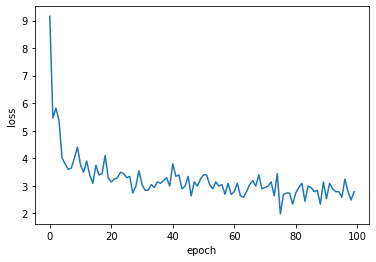

In [5]:
import matplotlib.pyplot as plt
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

그래프로를 그려보니 로지스틱 손실 함수의 값이 에포크가 진행됨에 따라 감소하고 있음을 확인할 수 있습니다. 축하합니다. 
성공적으로 가장 기초적인 신경망 알고리즘을 구현한 것입니다.  이 절에서 배운 것처럼 신경망 알고리즘은 로지스틱 회귀 알고리즘을 확장한 네트워크로 생각해도 좋습니다. 아직까지는 은닉층 사용하지 않았기 때문에 이 단일층 신경망으 로지스틱 회귀나 퍼셉트론 알고리즘과 매우 비슷합니다. 

지금까지는 선형 회귀, 로지스틱 회귀 등 신경망 알고리즘들을 직접 구현하였습니다. 하지만 사이킷런에는 이런 알고리즘들이 미리 구현되어 있습니다 사이킷런에 있는 SGDClassifier클래스를 사용해보도록 합니다. 

# Classification Thresholding

Logistic Regression은 예측된 확률 값이 임계값을 넘느냐 못 넘느냐에 따라서 class를 분류합니다. 이 임계값을 classification threshold 라고 합니다.

Classification threshold의 디폴트 값은 0.5 입니다. 만약 특정 데이터의 예측된 확률 값이 0.5 보다 크거나 같다면 해당 데이터는 positive class로 분류됩니다. 반대로 예측된 확률 값이 0.5 보다 낮다면 negative class로 분류됩니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-threshold01.png?raw=true" width=500></center>
<center> 그림 4:  </center>

위 그림은 피부암을 진단하는 모델의 데이터 분포와 classification threshold를 나타내고 있습니다. 노란색으로 색칠된 부분은 암 환자임에도 불구하고 정상으로 판단할 오류를 나타내는 영역입니다. 만약 더 많은 암 환자들을 찾아내고자 한다면 threshold를 0.3 이나 0.4 로 조정할 수 있습니다. 즉, 모델이 positive class를 더 많이 예측할 수 있도록 하는 것입니다. 물론 정상 사람들을 암환자라고 판단할 오류는 더 커지겠지만, 놓치고 있던 암환자를 찾아냄으로써 얻는 가치는 이를 감수할 수 있을 것입니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-threshold02.png?raw=true" width=500></center>
<center> 그림 5:  </center>

# 모델의 정확도 계산하는 방법들 

1. Accuracy(정확도), 
1. Recall(재현율), 
1. Precision(정밀도), 
1. F1 Score


Classification 을 할 수 있는 ML 알고리즘을 작성하였다면, 다음 단계는 해당 모델이 얼마나 잘 작동하는지 통계적으로 확인해보는 것입니다. 이러한 척도를 계산하는 공식에 대해서 알아봅시다.

## Accuracy


먼저 다음 피처를 활용하여 이번학기 성적이 B를 넘을지(1) 못 넘을지(0)를 예측하는 classifier를 작성하였다고 가정해봅시다.

- 이번 주 공부한 시간
- 이번 주 Netflix를 본 시간
- 이번 주 잠든 시간
- 시험 전 참석한 총 강의 시간

가장 간단하게 성능을 측정하는 방법은 accuracy(정확도) 를 계산하는 것입니다. Accuracy는 올바르게 예측된 데이터의 수를 전체 데이터의 수로 나눈 값입니다. 수식은 다음과 같습니다.

\begin{align}
\frac{TruePositives + TrueNegatives}{TruePositives + TrueNegatives + FalsePositives + FalseNegatives}
\end{align}

각각의 term들이 성적 예측 classifier에서 의미하는 바가 무엇인지를 정리하면 다음과 같습니다.



<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-accuracy_matrix.png?raw=true" width=500></center>
<center> 그림 6:  </center>

- True Positives - 모델은 성적이 B보다 높을 것이라고 예측하였고 실제로 그런 경우
- True Negatives - 모델은 성적이 B보다 낮을 것이라고 예측하였고 실제로 그런 경우
- False Positives - 모델은 성적이 B보다 높을 것이라고 예측하였고 실제로는 아닌 경우
- False Negatives - 모델은 성적이 B보다 낮을 것이라고 예측하였고 실제로는 아닌 경우

## Recall

위의 accuracy는 데이터에 따라 매우 잘못된 통계를 나타낼 수도 있습니다. 예를 들어, 내일 눈이 내릴지 아닐지를 예측하는 모델이 있다고 가정해 봅시다. 꽤 괜찮은 성능을 내는 모델을 작성할 수 있는데요, 바로 항상 False 로 예측하는 것입니다. 이 모델은 놀랍게도 굉장히 높은 accuracy를 갖습니다. 왜냐하면 눈이 내리는 날은 그리 많지 않기 때문이죠. 하지만 높은 accuracy를 보유함에도 불구하고 이 모델은 전혀 쓸모가 없습니다.

이러한 상황에서 도움을 줄 수 있는 통계치는 바로 recall(재현율) 입니다. Recall은 실제로 True인 데이터를 모델이 True라고 인식한 데이터의 수입니다. 위의 예시에서 recall은 모델이 눈이 내릴거라 예측한 날의 수를 실제로 눈이 내린 날의 수로 나눈 값입니다. 수식은 다음과 같습니다.

\begin{align}
\frac{TruePositives}{TruePositives + FalseNegatives}
\end{align}

즉, 항상 False 라고 예측하기 때문에 정확도는 높지만 recall은 0 이 되버립니다.

## Precision

안타깝게도 recall도 완벽한 통계치는 아닙니다. 예를 들어, 위의 눈내림 예측기 예에서 이번에는 항상 True 로 예측한다고 가정해봅시다. 물론 accuracy는 낮겠지만, 모델이 모든 날을 눈이 내릴거라 예측하기 때문에 recall은 1이 되고 맙니다. 이 모델은 항상 False 로 예측하는 모델과 다를 바 없지만 높은 recall을 보유하게됩니다.

이러한 상황에서 도움을 줄 수 있는 통계치는 바로 precision(정밀도) 입니다. Precision은 모델이 True로 예측한 데이터 중 실제로 True인 데이터이 수입니다. 위의 예시에서 precision은 실제로 눈이 내린 날의 수를 모델이 눈이 내릴거라 예측한 날의 수로 나눈 값입니다. 수식은 다음과 같습니다.




\begin{align}
\frac{TruePositives}{TruePositives + FalsePositives}
\end{align}

모델이 항상 눈이 내릴거라 예측하기 때문에 recall은 1 이지만, 실제로 눈이 내리는 날은 많지 않기 때문에 위 모델은 낮은 precision을 갖게 됩니다.

__Note:__ Precision과 recall은 서로 trade-off되는 관계가 있습니다.

## F1 Score

모델의 성능을 측정하는데 있어서 precision과 recall은 유용하게 사용됩니다. 그러나, 우리는 여전히 모델이 얼마나 효과적인지를 설명할 수 있는 한 가지 지표를 더 필요로합니다. 이 때 F1 score 가 사용됩니다.

F1 score는 precision 과 recall의 조화평균입니다. 수식은 다음과 같습니다.

\begin{align}
2 * \frac{Precision * Recall}{Precision + Recall}
\end{align}

F1 score는 precision과 recall을 조합하여 하나의 통계치를 반환합니다. 여기서 일반적인 평균이 아닌 조화 평균을 계산하였는데, 그 이유는 precision과 recall이 0 에 가까울수록 F1 score도 동일하게 낮은 값을 갖도록 하기 위함입니다.

예를 들어, recall = 1 이고 precision = 0.01 로 측정된 모델이 있다고 생각해봅시다. 위 모델에는 분명 문제가 있다고 판단할 수 있는데요. precision이 매우 낮기 때문에 F1 score에도 영향을 미치게 됩니다. 만약 일반적인 평균을 구하면 다음과 같습니다.

\begin{align}
\frac{1 + 0.01}{2} = 0.505
\end{align}

일반적으로 평균을 계산하면 높은 값이 나옵니다. 그러나 조화평균으로 계산하면 다음과 같은 결과를 얻습니다.

\begin{align}
2 * \frac{1 * 0.01}{1 + 0.01} = 0.019
\end{align}

F1 score가 매우 낮게 계산된 것을 확인할 수 있습니다.


## Scikit-Learn
scikit-learn에서는 이러한 지표들을 계산하는 메서드를 제공하고 있습니다. sklearn 의 metrics 모듈로부터 accuracy_score, recall_score, precision_score, 그리고 f1_score 를 불러와 활용할 수 있습니다. 각 메서드는 파라미터로 실제 labels와 예측된 결과를 받아 통계치를 계산한 후 이를 반환합니다.

In [1]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]	# 실제 labels
guesses = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]	# 에측된 결과

print(accuracy_score(labels, guesses))	# 0.3
print(recall_score(labels, guesses))	# 0.42
print(precision_score(labels, guesses))	# 0.5
print(f1_score(labels, guesses))	# 0.46

0.3
0.42857142857142855
0.5
0.4615384615384615


## Review

지금까지 ML 모델의 성능을 측정하는 몇 가지 지표에 대해서 알아보았습니다. 이번 포스팅에서 배운 내용을 정리하면 다음과 같습니다.

- Classifying a single point can result in a true positive (truth = 1, guess = 1), a true negative (truth = 0, guess = 0), a false positive (truth = 0, guess = 1), or a false negative (truth = 1, guess = 0).
- Accuracy measures how many classifications your algorithm got correct out of every classification it made.
- Recall measures the percentage of the relevant items your classifier was able to successfully find.
- Precision measures the percentage of items your classifier found that were actually relevant.
- Precision and recall are tied to each other. As one goes up, the other will go down.
- F1 score is a combination of precision and recall.
- F1 score will be low if either precision or recall is low.

사실 이 지표들 중 에서 어떤 것을 써야 할지는 전적으로 모델의 맥락에 달려 있습니다. 만약 모델이 많은 false positives를 보유해도 상관이 없다면, 이러한 경우 precision은 별 의미가 없습니다. ML로 해결하려는 문제가 무엇인지를 정확하게 알면 알 수록 위 지표들 중 어떠한 것을 사용해야 할지를 결정할 수 있습니다.

# 참고문헌

1. 케라스 창시자에게 배우는 딥러닝, 프랑소와 숄레, 길벗
1. 핸즈온 머신러닝, 오렐리앙 제롱, 한빛미디어
1. 딥러닝 입문, 박해선, 이지스 퍼블리싱
1. 파이썬으로 배우는 기계학습, 김영섭, K-MOOC

-------
__Be joyful always!__ 1 Thes.5:16